# The General Pipeline Interface

__Import libraries__

In [1]:
# essential tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
%matplotlib inline

# datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# feature selections
from sklearn.feature_selection import SelectPercentile, f_regression

# feature extraction
from sklearn.decomposition import PCA

# model selections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# ML algorithms
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

- Pipeline can join any number of estimators together. 
- For example, we can build a pipeline containing feature extraction, feature selection, scaling, and classification.
- Internally, during the call to Pipeline.fit, the pipeline calls fit and then transform on each step in turn,2 with the input given by the output of the transform method of the previous step. For the last step in the pipeline, just fit is called.
- Brushing over some finer details, this is implemented as follows. Remember that pipe line.steps is a list of tuples, so pipeline.steps[0][1] is the first estimator, pipe line.steps[1][1] is the second estimator, and so on:

In [2]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        # iterate over all but the final step
        # fit and transform the data
        X_transformed = estimator.fit_transform(X_transformed, y)
    # fit the last step
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [3]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        # iterate over all but the final step
        # transform the data
        X_transformed = step[1].transform(X_transformed)
    # predict using the last step
    return self.steps[-1][1].predict(X_transformed)

The pipeline is actually even more general than this. There is no requirement for the
last step in a pipeline to have a predict function, and we could create a pipeline just
containing, for example, a scaler and PCA. Then, because the last step (PCA) has a
transform method, we could call transform on the pipeline to get the output of
PCA.transform applied to the data that was processed by the previous step. The last
step of a pipeline is only required to have a fit method.

## Convenient Pipeline Creation with make_pipeline

In [7]:
# standard syntax
pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [8]:
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


In [10]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


## Accessing Step Attributes

In [4]:
cancer = load_breast_cancer()

In [5]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

We use a logarithmic
grid for this parameter, searching between 0.01 and 100. Because we used the
make_pipeline function, the name of the LogisticRegression step in the pipeline is
the lowercased class name, logisticregression. To tune the parameter C, we therefore
have to specify a parameter grid for logisticregression__C:

In [6]:
param_grid = {'logisticregression__C' : [0.01, 0.1, 1, 10, 100]}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


This best_estimator_ in our case is a pipeline with two steps, standardscaler and
logisticregression. To access the logisticregression step, we can use the
named_steps attribute of the pipeline, as explained earlier:

In [18]:
print("Logistic regression step:\n{}".format(grid.best_estimator_.named_steps['logisticregression']))

Logistic regression step:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [19]:
print("Logistic regression coefficients:\n{}".format(
grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


---

# Grid-Searching Preprocessing Steps and Model Parameters

Using pipelines, we can encapsulate all the processing steps in our machine learning
workflow in a single scikit-learn estimator. Another benefit of doing this is that we
can now adjust the parameters of the preprocessing using the outcome of a supervised
task like regression or classification. In previous chapters, we used polynomial features
on the boston dataset before applying the ridge regressor. Let’s model that using
a pipeline instead.

In [22]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [23]:
param_grid = {'polynomialfeatures__degree' : [1, 2, 3],
              'ridge__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [24]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
print(grid.cv_results_['mean_test_score'])

[ 7.21735274e-01  7.21738769e-01  7.21773334e-01  7.22082657e-01
  7.23132632e-01  7.07798428e-01  7.59797629e-01  7.59075487e-01
  7.66255824e-01  7.94655821e-01  8.28512954e-01  8.04709246e-01
 -5.82627406e+02 -1.61323929e+02 -1.32335714e+01 -3.39779344e-02
  6.47699093e-01  6.53348651e-01]


In [32]:
grid.cv_results_['mean_test_score'].reshape(3, -1).shape

(3, 6)

In [33]:
grid.cv_results_['mean_test_score'].shape

(18,)

In [35]:
grid.cv_results_['mean_test_score'].reshape(-1, 6).shape

(3, 6)

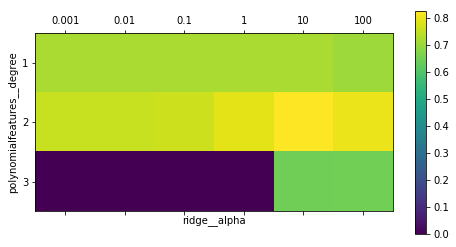

In [36]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
            param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [37]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [38]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.77


In [39]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.63


C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Searching over preprocessing parameters together with model parameters is a very
powerful strategy. However, keep in mind that GridSearchCV tries all possible combinations
of the specified parameters. Therefore, adding more parameters to your grid
exponentially increases the number of models that need to be built.

---

# Grid-Searching Which Model to Use

- Trying all possible solutions is usually not a viable machine learning strategy

In [60]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

Now we can define the parameter_grid to search over. We want the classifier to
be either RandomForestClassifier or SVC. Because they have different parameters to
tune, and need different preprocessing, we can make use of the list of search grids. To assign an estimator
to a step, we use the name of the step as the parameter name. When we wanted to
skip a step in the pipeline (for example, because we don’t need preprocessing for the
RandomForest), we can set that step to None

In [61]:
param_grid = [
{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'classifier': [RandomForestClassifier(n_estimators=100)],
'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.99
Test-set score: 0.98


In this chapter we introduced the Pipeline class, a general-purpose tool to chain
together multiple processing steps in a machine learning workflow. Real-world applications
of machine learning rarely involve an isolated use of a model, and instead are
a sequence of processing steps. Using pipelines allows us to encapsulate multiple steps
into a single Python object that adheres to the familiar scikit-learn interface of fit,
predict, and transform. In particular when doing model evaluation using crossvalidation
and parameter selection using grid search, using the Pipeline class to capture
all the processing steps is essential for proper evaluation. The Pipeline class also
allows writing more succinct code, and reduces the likelihood of mistakes that can
happen when building processing chains without the pipeline class (like forgetting
to apply all transformers on the test set, or not applying them in the right order).
Choosing the right combination of feature extraction, preprocessing, and models is
somewhat of an art, and often requires some trial and error. However, using pipelines,
this “trying out” of many different processing steps is quite simple. When experimenting, be careful not to overcomplicate your processes, and make sure to
evaluate whether every component you are including in your model is necessary.
With this chapter, we have completed our survey of general-purpose tools and algorithms
provided by scikit-learn. You now possess all the required skills and know
the necessary mechanisms to apply machine learning in practice. In the next chapter,
we will dive in more detail into one particular type of data that is commonly seen in
practice, and that requires some special expertise to handle correctly: text data.

---

# IMPORTANT POINTS

- Pipelining makes code more shorter.
- Procedures:
    - Create pipeline object by using Pipeline constructor or make_pipeline.
    - Syntax: list of tuples, name and objects (constructors)
    - Create param_grid: list of dictionaries or single dictionary
    - Instantiate GridSearch with parameters: pipe, param_grid, cv
    - Fit the data.
    - We can use predict, check score on test set, cv_results
    - Attribute: named_steps